### Import all libraries

In [142]:
import pandas as pd
import numpy as np

# Data transformation 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer


# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

Here, we have loaded 3 types of Libraries

a) Inbuilt Library

b) Skitlearn Library

## Data Collection

According to client inputs, our domain experts and data analysts team created the dataset in.CSV format. Additionally, we will train our machine learning (ML) algorithm using the same dataset.

In [143]:
df= pd.read_csv('data/Cars_data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


Load the dataset files with csv extension from the dataset folder.

In [144]:
print('No. of Rows: ',df.shape[0])
print('No. of Columns: ',df.shape[1])

No. of Rows:  11914
No. of Columns:  16


## Data Pre-processing

As we know that, Machine Learning Model doesn't understand the Raw data, Hence we are doing the pre-processing on the data to feed the data to ML algorithm.

In [145]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [146]:
df['Engine Fuel Type'] = df['Engine Fuel Type'].fillna(df['Engine Fuel Type'].mode()[0])
df['Engine HP'] = df['Engine HP'].fillna(df['Engine HP'].mean())
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(df['Engine Cylinders'].mean())
df['Number of Doors'] = df['Number of Doors'].fillna(df['Number of Doors'].mean())
df['Market Category'] = df['Market Category'].fillna(df['Market Category'].mode()[0])

In [147]:
df.isna().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Splitting Features and Lable

In [148]:
X = df.drop(columns = ['MSRP'], axis=1)
X.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916


In [149]:
y = df['MSRP']
y.head()

0    46135
1    40650
2    36350
3    29450
4    34500
Name: MSRP, dtype: int64

##  Feature Engineering 

### Option: 1

#### Encoding Categorical Attributes

In [150]:
enc= OneHotEncoder(handle_unknown='ignore')
enc.fit(X)

X= enc.transform(X)

print('x shape: ',X.shape)
print('y shape: ',y.shape)

x shape:  (11914, 1647)
y shape:  (11914,)


#### Standardization

In [151]:
scaler=StandardScaler(with_mean=False)
scaler.fit(X)

X= scaler.transform(X)

print('x shape: ',X.shape)
print('y shape: ',y.shape)

x shape:  (11914, 1647)
y shape:  (11914,)


#### Dimensionality Reduction

In [152]:
pca= PCA(n_components=30)
pca.fit(X.toarray())

X= pca.transform(X.toarray())

print('x shape: ',X.shape)
print('y shape: ',y.shape)

x shape:  (11914, 30)
y shape:  (11914,)


### Option: 2

In [153]:
'''
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.impute import SimpleImputer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown=False)

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
         ("PCA", PCA(n_components=5), cat_features)        
    ]
)

X = preprocessor.fit_transform(X)
'''

'\n# Create Column Transformer with 3 types of transformers\nnum_features = X.select_dtypes(exclude="object").columns\ncat_features = X.select_dtypes(include="object").columns\n\nfrom sklearn.impute import SimpleImputer\n\nnumeric_transformer = StandardScaler()\noh_transformer = OneHotEncoder(handle_unknown=False)\n\npreprocessor = ColumnTransformer(\n    [\n        ("OneHotEncoder", oh_transformer, cat_features),\n         ("StandardScaler", numeric_transformer, num_features),\n         ("PCA", PCA(n_components=5), cat_features)        \n    ]\n)\n\nX = preprocessor.fit_transform(X)\n'

In [154]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((9531, 30), (2383, 30))

## Model Training

#### Algorithm Selection without Hyperparameter Tunning

In [155]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square
    
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 26765.6133
- Mean Absolute Error: 12079.8763
- R2 Score: 0.8172
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 21875.3019
- Mean Absolute Error: 12245.6224
- R2 Score: 0.7992


Lasso
Model performance for Training set
- Root Mean Squared Error: 26765.6134
- Mean Absolute Error: 12079.7004
- R2 Score: 0.8172
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 21875.1701
- Mean Absolute Error: 12245.4292
- R2 Score: 0.7992


Ridge
Model performance for Training set
- Root Mean Squared Error: 26765.6133
- Mean Absolute Error: 12079.7860
- R2 Score: 0.8172
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 21875.2193
- Mean Absolute Error: 12245.5253
- R2 Score: 0.7992


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 20094.5260
- Mean Absolute Erro

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 8983.5186
- Mean Absolute Error: 2326.9137
- R2 Score: 0.9794
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10769.8905
- Mean Absolute Error: 4121.2299
- R2 Score: 0.9513


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 5233.1745
- Mean Absolute Error: 2164.0033
- R2 Score: 0.9930
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 10542.8669
- Mean Absolute Error: 4135.6176
- R2 Score: 0.9534


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 6042.9045
- Mean Absolute Error: 3115.9375
- R2 Score: 0.9907
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11303.4333
- Mean Absolute Error: 4370.0289
- R2 Score: 0.9464


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 24649.4616
- M

## Model Assessment

In [156]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.953367
5,Random Forest Regressor,0.951337
7,CatBoosting Regressor,0.946397
3,K-Neighbors Regressor,0.922103
4,Decision Tree,0.915134
1,Lasso,0.799241
2,Ridge,0.799240
0,Linear Regression,0.799239
8,AdaBoost Regressor,0.728078


#### Algorithm Selection And Hyperparameter Tunning

In [157]:
parameter_grids = {'n_neighbors' : np.arange(5,20,5),
                   'weights': ['uniform', 'distance'],
                  'leaf_size' : np.arange(2,20,2),
                   'p' : [1,2]}

model_1 = GridSearchCV(KNeighborsRegressor(),
                      param_grid=parameter_grids,
                      scoring='r2',
                      cv=5,
                      error_score='raise',
                      n_jobs=-1)

model_1.fit(X_train,y_train)

print('r2 Score of KNeighborsRegressor = {:.2f}'.format(model_1.best_score_))
print('Best found Hyperparameter of KNeighborsRegressor = {}'.format(model_1.best_params_))

r2 Score of KNeighborsRegressor = 0.90
Best found Hyperparameter of KNeighborsRegressor = {'leaf_size': 2, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}


In [158]:
parameter_grids = {'criterion': ['squared_error', 'friedman_mse', 'absolute_error','poisson'],
                  'max_depth' : range(1,30,3), #[1,4,7...]
                  'max_features':[0.25,0.5,0.75,1.0],
                  'min_samples_split' : range(2,20,3)}

model_2 = RandomizedSearchCV(DecisionTreeRegressor(random_state=42),
                      param_distributions= parameter_grids,
                      n_iter= 10,
                      scoring='r2',
                      error_score='raise',
                      cv=5,
                      n_jobs=-1)

model_2.fit(X_train,y_train)

print('r2 Score of DecisionTreeRegressor = {:.2f}'.format(model_2.best_score_))
print('Best found Hyperparameter of DecisionTreeRegressor = {}'.format(model_2.best_params_))

r2 Score of DecisionTreeRegressor = 0.81
Best found Hyperparameter of DecisionTreeRegressor = {'min_samples_split': 8, 'max_features': 0.25, 'max_depth': 28, 'criterion': 'poisson'}


In [159]:
parameter_grids = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
                   'C' : [0.01, 0.1, 10, 20]
                   }

model_3 = GridSearchCV(SVR(),
                      param_grid=parameter_grids,
                      scoring='r2',
                      error_score='raise',
                      cv=5,
                      n_jobs=-1)

model_3.fit(X_train,y_train)

print('r2 Score of SVM = {:.2f}'.format(model_3.best_score_))
print('Best found Hyperparameter of SVM = {}'.format(model_3.best_params_))

r2 Score of SVM = 0.72
Best found Hyperparameter of SVM = {'C': 20, 'kernel': 'linear'}


In [160]:
parameter_grids = {'n_estimators' : range(100,150,50),
                   'loss': ['linear', 'square', 'exponential']
                   }

model_4 = GridSearchCV(AdaBoostRegressor(random_state=42),
                      param_grid=parameter_grids,
                      scoring='r2',
                      error_score='raise',
                      cv=5,
                      n_jobs=-1)

model_4.fit(X_train,y_train)

print('r2 Score of AdaBoostRegressor = {:.2f}'.format(model_4.best_score_))
print('Best found Hyperparameter of AdaBoostRegressor = {}'.format(model_4.best_params_))

r2 Score of AdaBoostRegressor = 0.70
Best found Hyperparameter of AdaBoostRegressor = {'loss': 'square', 'n_estimators': 100}


In [161]:
parameter_grids = {'n_estimators' : range(100,200,50),
                   'criterion': ['squared_error', 'friedman_mse', 'absolute_error','poisson'],
                  'max_depth' : range(2,20,3), 
                  'max_features':[0.5,0.75,1.0],
                  'min_samples_split' : range(2,10,3)}

model_5 = RandomizedSearchCV(RandomForestRegressor(random_state=42, n_jobs=-1),
                      param_distributions= parameter_grids,
                      n_iter= 5,
                      scoring='r2',
                      error_score='raise',
                      cv=5,
                      n_jobs=-1)

model_5.fit(X_train,y_train)

print('r2 Score of RandomForestRegressor = {:.2f}'.format(model_5.best_score_))
print('Best found Hyperparameter of RandomForestRegressor = {}'.format(model_5.best_params_))

r2 Score of RandomForestRegressor = 0.89
Best found Hyperparameter of RandomForestRegressor = {'n_estimators': 150, 'min_samples_split': 2, 'max_features': 0.5, 'max_depth': 14, 'criterion': 'poisson'}


##  Model Evalution

In [162]:
y_predict= model_5.predict(X_test)
print('\Random Forest Regressor R2_Score on Test: ',r2_score(y_test, y_predict)*100,'%')

\Random Forest Regressor R2_Score on Test:  95.10575668131328 %


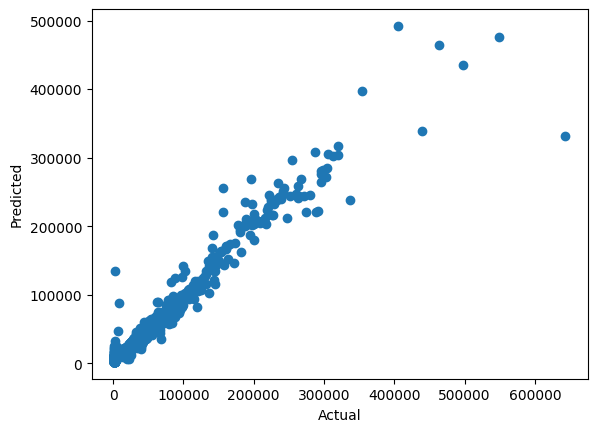

In [163]:
plt.scatter(y_test,y_predict);
plt.xlabel('Actual');
plt.ylabel('Predicted');

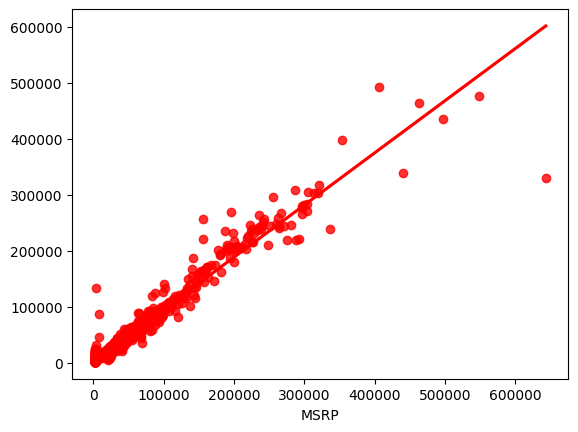

In [164]:
sns.regplot(x=y_test,y=y_predict,ci=None,color ='red');

Difference between Actual and Predicted Values

In [165]:
predicated_df = pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_predict, 'Difference':y_test-y_predict}).astype(int)
predicated_df

,Actual Value,Predicted Value,Difference
3995,29695,32373,-2678
7474,30495,26021,4473
7300,37650,35937,1712
3148,16170,18728,-2558
747,2000,2488,-488
...,...,...,...
267,35550,37419,-1869
4320,48360,60558,-12198
5799,31750,27241,4508
6080,20995,23043,-2048
